# Exploratory Data Analysis and Data Visualisation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('cleaned_japandata.csv')

In [68]:
print(data.head())

                               time  latitude  longitude   depth  mag    nst  \
0  2023-03-02 07:19:01.487000+00:00   32.5313   135.7405  16.123  4.5   30.0   
1  2023-03-02 06:47:39.954000+00:00   33.3315   139.4942   9.945  5.1   65.0   
2  2023-03-02 06:14:51.230000+00:00   43.4055   147.2168  40.090  5.2   91.0   
3  2023-02-28 15:48:02.842000+00:00   35.6762   140.7823  43.894  4.5   27.0   
4  2023-02-28 11:12:09.077000+00:00   32.9764   141.6939  10.000  5.2  136.0   

   horizontalError  depthError  magError  magNst  year  month  day  \
0             5.07       4.815     0.131    18.0  2023      3    2   
1             5.01       4.540     0.073    18.0  2023      3    2   
2             8.74       6.763     0.024   558.0  2023      3    2   
3             6.74       5.915     0.089    12.0  2023      2   28   
4             6.71       1.847     0.083    14.0  2023      2   28   

   mag_category  season  normalized_magnitude  
0             1       1              0.000000  
1 

## summary statistics for numerical features

In [69]:
print(data.describe())

          latitude    longitude        depth          mag          nst  \
count  9607.000000  9607.000000  9607.000000  9607.000000  9607.000000   
mean     37.085907   141.630946    34.795137     4.829401   105.115228   
std       3.404212     3.195663    19.824753     0.386234   100.147134   
min      29.473000   127.329300     0.000000     4.500000     5.000000   
25%      35.283000   140.957550    17.600000     4.600000    54.000000   
50%      37.172000   141.979300    35.000000     4.700000    74.000000   
75%      39.073500   143.167000    46.150000     4.900000   107.000000   
max      45.468000   148.534900    98.830000     9.100000   929.000000   

       horizontalError   depthError     magError       magNst         year  \
count      2864.000000  6676.000000  3147.000000  9607.000000  9607.000000   
mean          6.680429     6.282418     0.085683    44.639846  2011.583012   
std           1.684128     3.650436     0.038447    61.533295     5.707124   
min           2.30000

# Accounting for Errors 

## In our dataset, we see columns for horizontalError, depthError, magError which has the following definitions:

## horizontalError: Error measurement in the horizontal location, in kilometers.

## depthError: Error measurement in the depth, in kilometers.

## magError: Error measurement in the magnitude.


In [70]:
# convert error columns to numeric, handling any non-numeric values that might be present
data['Horizontal Error (km)'] = pd.to_numeric(data['horizontalError'], errors='coerce')
data['Depth Error (km)'] = pd.to_numeric(data['depthError'], errors='coerce')
data['Magnitude Error'] = pd.to_numeric(data['magError'], errors='coerce')
data['Magnitude'] = pd.to_numeric(data['mag'], errors='coerce')

In [71]:
error_stats = data[['horizontalError', 'depthError', 'magError']].describe()
print(error_stats)


       horizontalError   depthError     magError
count      2864.000000  6676.000000  3147.000000
mean          6.680429     6.282418     0.085683
std           1.684128     3.650436     0.038447
min           2.300000     0.000000     0.021000
25%           5.600000     3.800000     0.057000
50%           6.700000     5.700000     0.078000
75%           7.800000     8.000000     0.107000
max          11.020000    16.500000     0.202000


In [72]:
# thresholds for acceptable errors
horizontal_error_threshold = 5.0  # km
depth_error_threshold = 10.0  # km
magnitude_error_threshold = 0.1  # magnitude units

# filter data based on these thresholds
filtered_data = data[
    (data['horizontalError'] <= horizontal_error_threshold) &
    (data['depthError'] <= depth_error_threshold) &
    (data['magError'] <= magnitude_error_threshold)
]

print(f"Filtered data contains {len(filtered_data)} records from the original {len(data)} records")


Filtered data contains 317 records from the original 9607 records


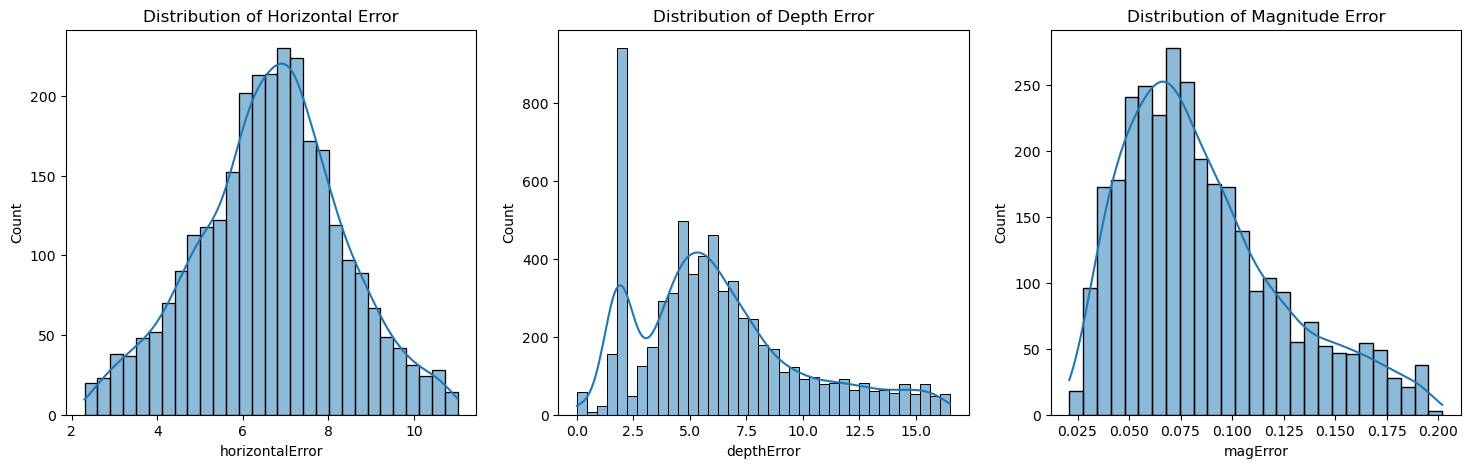

In [73]:
# histograms of errors
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['horizontalError'], kde=True)
plt.title('Distribution of Horizontal Error')

plt.subplot(1, 3, 2)
sns.histplot(data['depthError'], kde=True)
plt.title('Distribution of Depth Error')

plt.subplot(1, 3, 3)
sns.histplot(data['magError'], kde=True)
plt.title('Distribution of Magnitude Error')

plt.show()

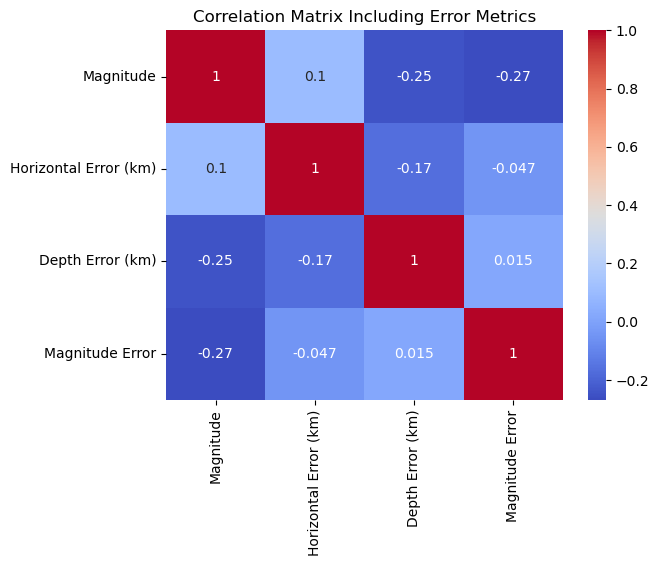

In [74]:
# correlation matrix including magnitude and errors
correlation_matrix = filtered_data[['Magnitude', 'Horizontal Error (km)', 'Depth Error (km)', 'Magnitude Error']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Including Error Metrics')
plt.show()

## By identifying and filtering out data's with high error rates (beyond the acceptable threshold), we can consider dropping them or giving them less weightage.

Original data count: 9607
Filtered data count: 317


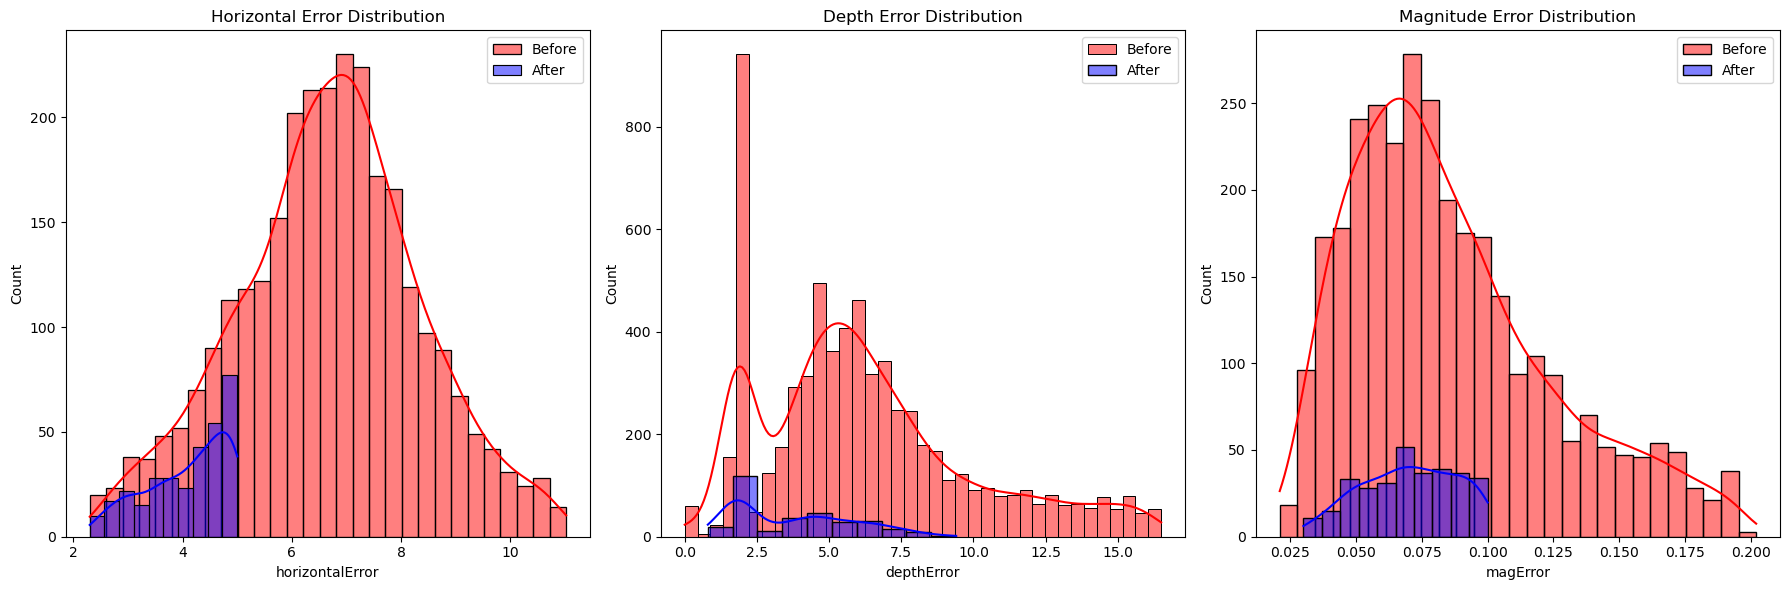

In [75]:
print(f"Original data count: {len(data)}")
print(f"Filtered data count: {len(filtered_data)}")

# distribution of errors before and after filtering
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['horizontalError'], color='red', label='Before', kde=True)
sns.histplot(filtered_data['horizontalError'], color='blue', label='After', kde=True)
plt.title('Horizontal Error Distribution')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(data['depthError'], color='red', label='Before', kde=True)
sns.histplot(filtered_data['depthError'], color='blue', label='After', kde=True)
plt.title('Depth Error Distribution')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(data['magError'], color='red', label='Before', kde=True)
sns.histplot(filtered_data['magError'], color='blue', label='After', kde=True)
plt.title('Magnitude Error Distribution')
plt.legend()

plt.tight_layout()
plt.show()

In [76]:
print("Total count of usable data:", len(filtered_data))

Total count of usable data: 317


# Since the data set after full removal of these points is only left with 329, which is too small for our machine learning thereafter, we will appoint a lower weight for each of these points instead

Weighted Average Magnitude: 4.763823929801399


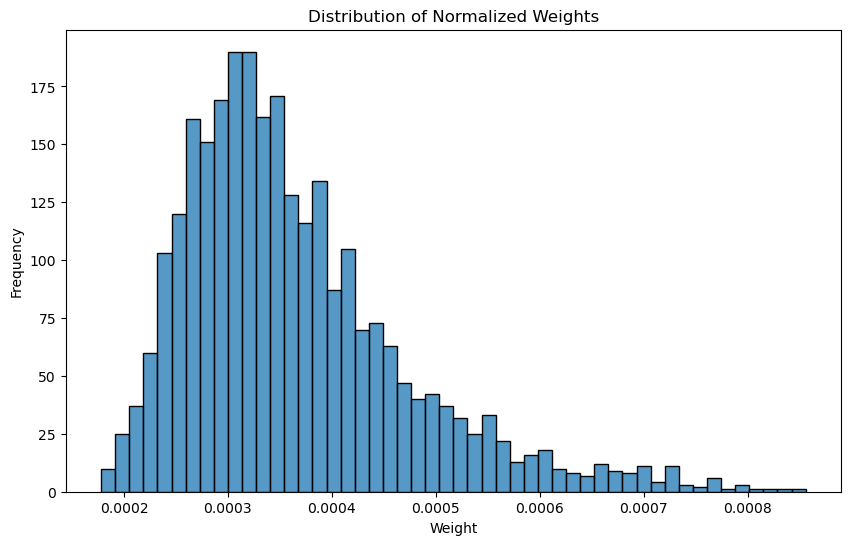

In [77]:
# small constant to error values to avoid division by zero
small_constant = 0.01

data['Weight'] = 1 / (data['horizontalError'] + data['depthError'] + data['magError'] + small_constant)
data['Normalized Weight'] = data['Weight'] / data['Weight'].sum()

# weighted average of magnitude
weighted_average_magnitude = (data['mag'] * data['Normalized Weight']).sum()
print(f"Weighted Average Magnitude: {weighted_average_magnitude}")

# weight distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Normalized Weight'], bins=50, kde=False)
plt.title('Distribution of Normalized Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

Number of usable data points: 2749


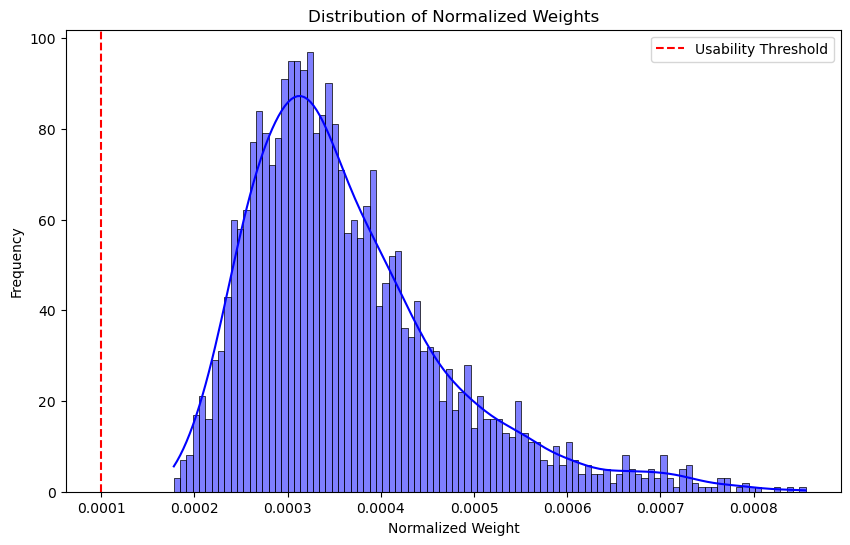

In [78]:
# defining threshold for a usable weight
usable_weight_threshold = 0.0001

usable_data_count = (data['Normalized Weight'] >= usable_weight_threshold).sum()
print(f"Number of usable data points: {usable_data_count}")

# histogram of normalized weights
plt.figure(figsize=(10, 6))
sns.histplot(data['Normalized Weight'], bins=100, color='blue', kde=True)
plt.axvline(x=usable_weight_threshold, color='red', linestyle='--', label='Usability Threshold')
plt.title('Distribution of Normalized Weights')
plt.xlabel('Normalized Weight')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## For our further Exploratory Data Analysis, we will focus on looking at other variables to give us insights for our Machine Learning later on

# Exploratory Data Analysis

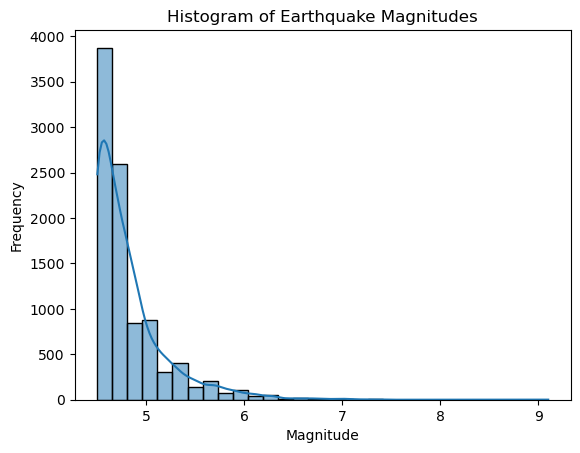

In [79]:
sns.histplot(data['mag'], bins=30, kde=True)
plt.title('Histogram of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

As we can see, frequency of earthquake magnitude skew towards the left, showing the small earthquakes are more common then once in a blue moon big earthquake.

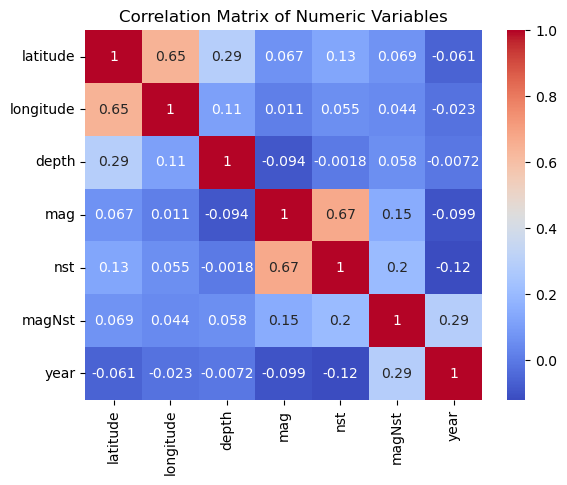

In [80]:
correlation_matrix = data[['latitude', 'longitude', 'depth', 'mag', 'nst', 'magNst', 'year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

## Trying to look at heatmap of a correlation matrix for various numerical variables that might give us insights to any features with a correlation to magnitude. theres a moderate positive correlation (0.67) between nst and mag, indicating that larger earthquakes tend to be reported by more stations
## But also saw that there appears to be a moderate positive correlation (0.65) between latitude and longitude, which might be characteristic of japan's tectonic plates.

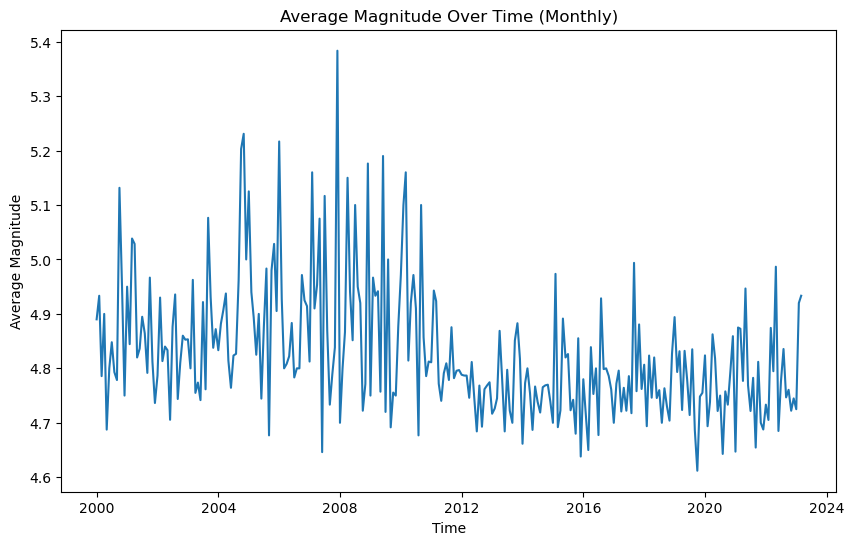

In [107]:
data['year_month'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2)
data['year_month'] = pd.to_datetime(data['year_month'])

# group data by 'year_month' and calculate the average magnitude
monthly_magnitude = data.groupby('year_month')['mag'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='year_month', y='mag', data=monthly_magnitude)
plt.title('Average Magnitude Over Time (Monthly)')
plt.xlabel('Time')
plt.ylabel('Average Magnitude')
plt.show()


## here we're aiming to analyse and visualise the trend of average earthquake magnitudes over time on a monthly basis. The only noticable difference was the slight peak in average monthly magnitude in 2008. There doesn't seem to be a clear upward or downward trend, which suggests that average magnitudes are relatively stable but do fluctuate.

### 

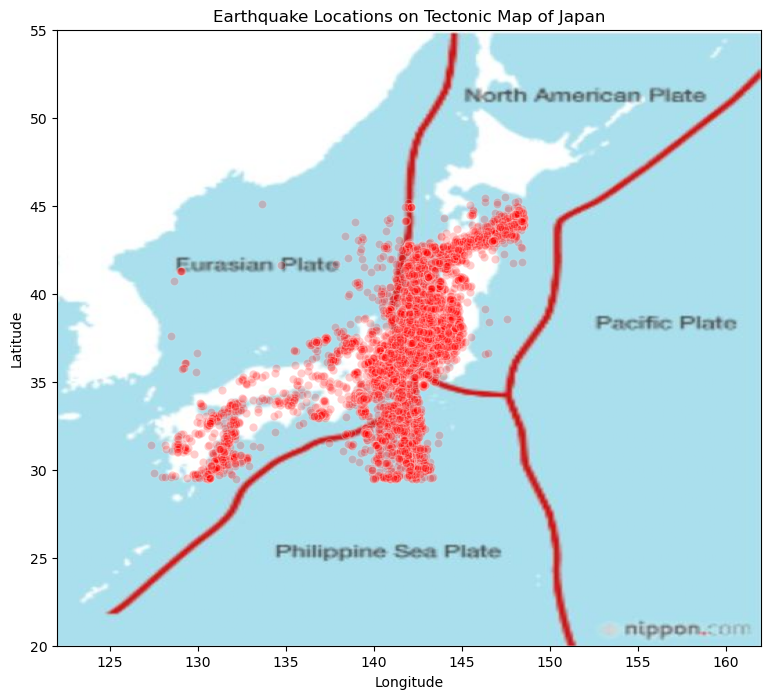

In [82]:
import matplotlib.image as mpimg

img_path = 'Tectonic Plate.png'  # Update this path
img = mpimg.imread(img_path)
min_longitude = 122
max_longitude = 162
min_latitude = 20
max_latitude = 55

fig, ax = plt.subplots(figsize=(10, 8))

ax.imshow(img, extent=[min_longitude, max_longitude, min_latitude, max_latitude]) 

sc = ax.scatter(data['longitude'], data['latitude'], c='red', alpha=0.2, edgecolors='white', linewidth=0.8)

ax.set_title('Earthquake Locations on Tectonic Map of Japan')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim([min_longitude, max_longitude])  # setting the limits to match the image's geographic scope
ax.set_ylim([min_latitude, max_latitude])

plt.show()


## we placed the earthquake occurrences on a plot with the tectonic boundary map and shows a dense clustering of earthquakes along the boundaries between the tectonic plates, particularly where the Pacific Plate, the Philippine Sea Plate, and the Eurasian Plate meet. This clustering of seismic activity at plate boundaries is consistent with well-known geological knowledge that tectonic movements at these locations are a major cause of earthquakes

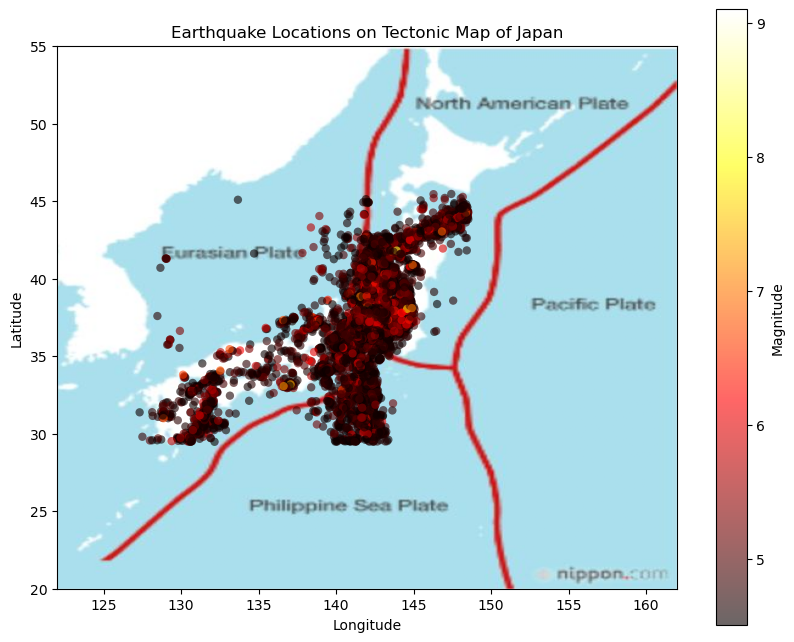

In [83]:
img_path = 'Tectonic Plate.png'
img = mpimg.imread(img_path)
min_longitude = 122
max_longitude = 162
min_latitude = 20
max_latitude = 55

fig, ax = plt.subplots(figsize=(10, 8))

ax.imshow(img, extent=[min_longitude, max_longitude, min_latitude, max_latitude]) 

sc = ax.scatter(data['longitude'], data['latitude'], c=data['mag'], cmap='hot', alpha=0.6, edgecolors='none')

cbar = plt.colorbar(sc)
cbar.set_label('Magnitude')

ax.set_title('Earthquake Locations on Tectonic Map of Japan')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim([min_longitude, max_longitude]) 
ax.set_ylim([min_latitude, max_latitude])

plt.show()


## we did the same plot but added the aspect of magnitude with different hues to differenciate but it was densely populated with low magnitude earthquake occurrences

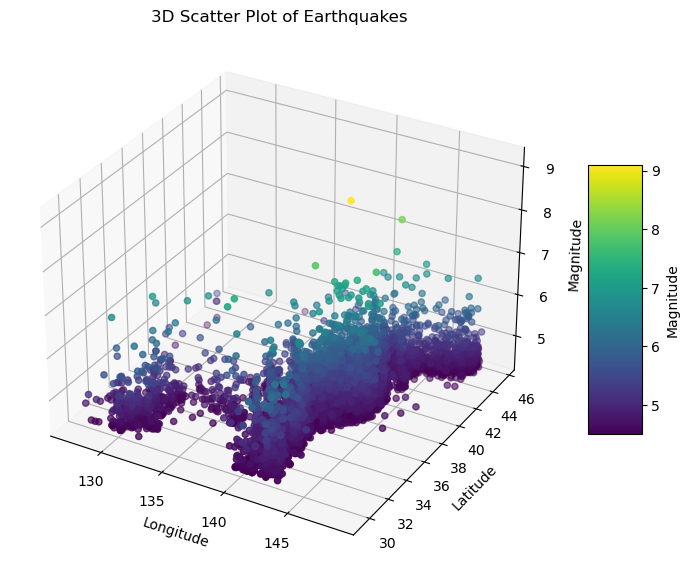

In [106]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# scatter plot for longitude, latitude, and magnitude
sc = ax.scatter(data['longitude'], data['latitude'], data['mag'], c=data['mag'], cmap='viridis', marker='o')

cbar = plt.colorbar(sc, shrink=0.5, aspect=5)
cbar.set_label('Magnitude')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Magnitude')
ax.set_title('3D Scatter Plot of Earthquakes')

plt.show()


## same idea of adding a magnitude to the plot with 'longitude' and 'lat' but it was hard to see any patterns

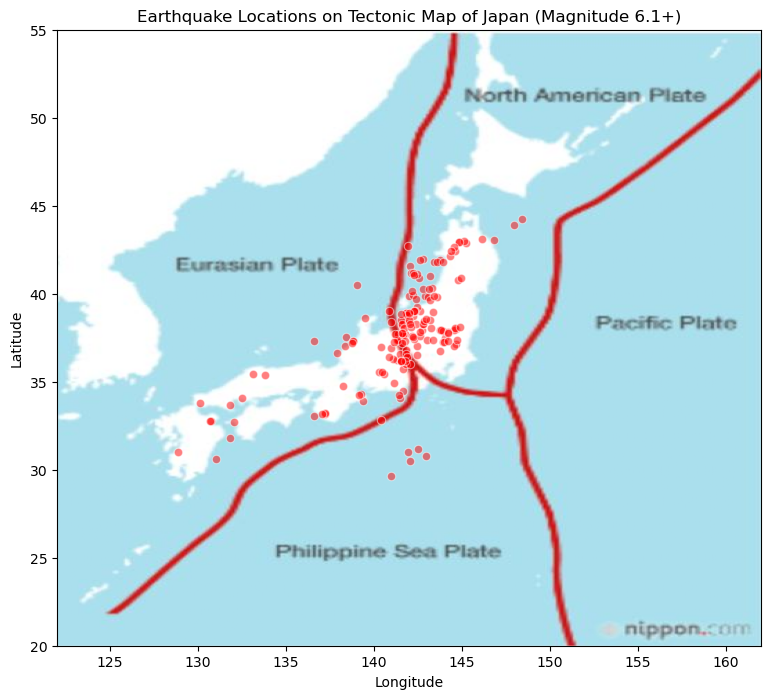

In [84]:
img_path = 'Tectonic Plate.png'
img = mpimg.imread(img_path)
min_longitude = 122
max_longitude = 162
min_latitude = 20
max_latitude = 55

# filtering the dataset to include only earthquakes with magnitude 6 or above
data_above_mag_6 = data[data['mag'] >= 6.1]

fig, ax = plt.subplots(figsize=(10, 8))

# image displaying
ax.imshow(img, extent=[min_longitude, max_longitude, min_latitude, max_latitude]) 


sc = ax.scatter(data_above_mag_6['longitude'], data_above_mag_6['latitude'], c='red', alpha=0.5, edgecolors='white', linewidth=0.8)

ax.set_title('Earthquake Locations on Tectonic Map of Japan (Magnitude 6.1+)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim([min_longitude, max_longitude])  
ax.set_ylim([min_latitude, max_latitude])

plt.show()


# Here we filter earthquake data for significant seismic events, specifically those with a magnitude of 6.1 or greater. There is a noticeable clustering of these significant earthquakes at certain points along the plate boundaries as well as toward the north eastern part of japan too. It can be said that the regions with higher longitude and latitude in japan will more likely face earthquakes with greater magnitude that of those in the lower latitude longitude regions

C:\Users\chenl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


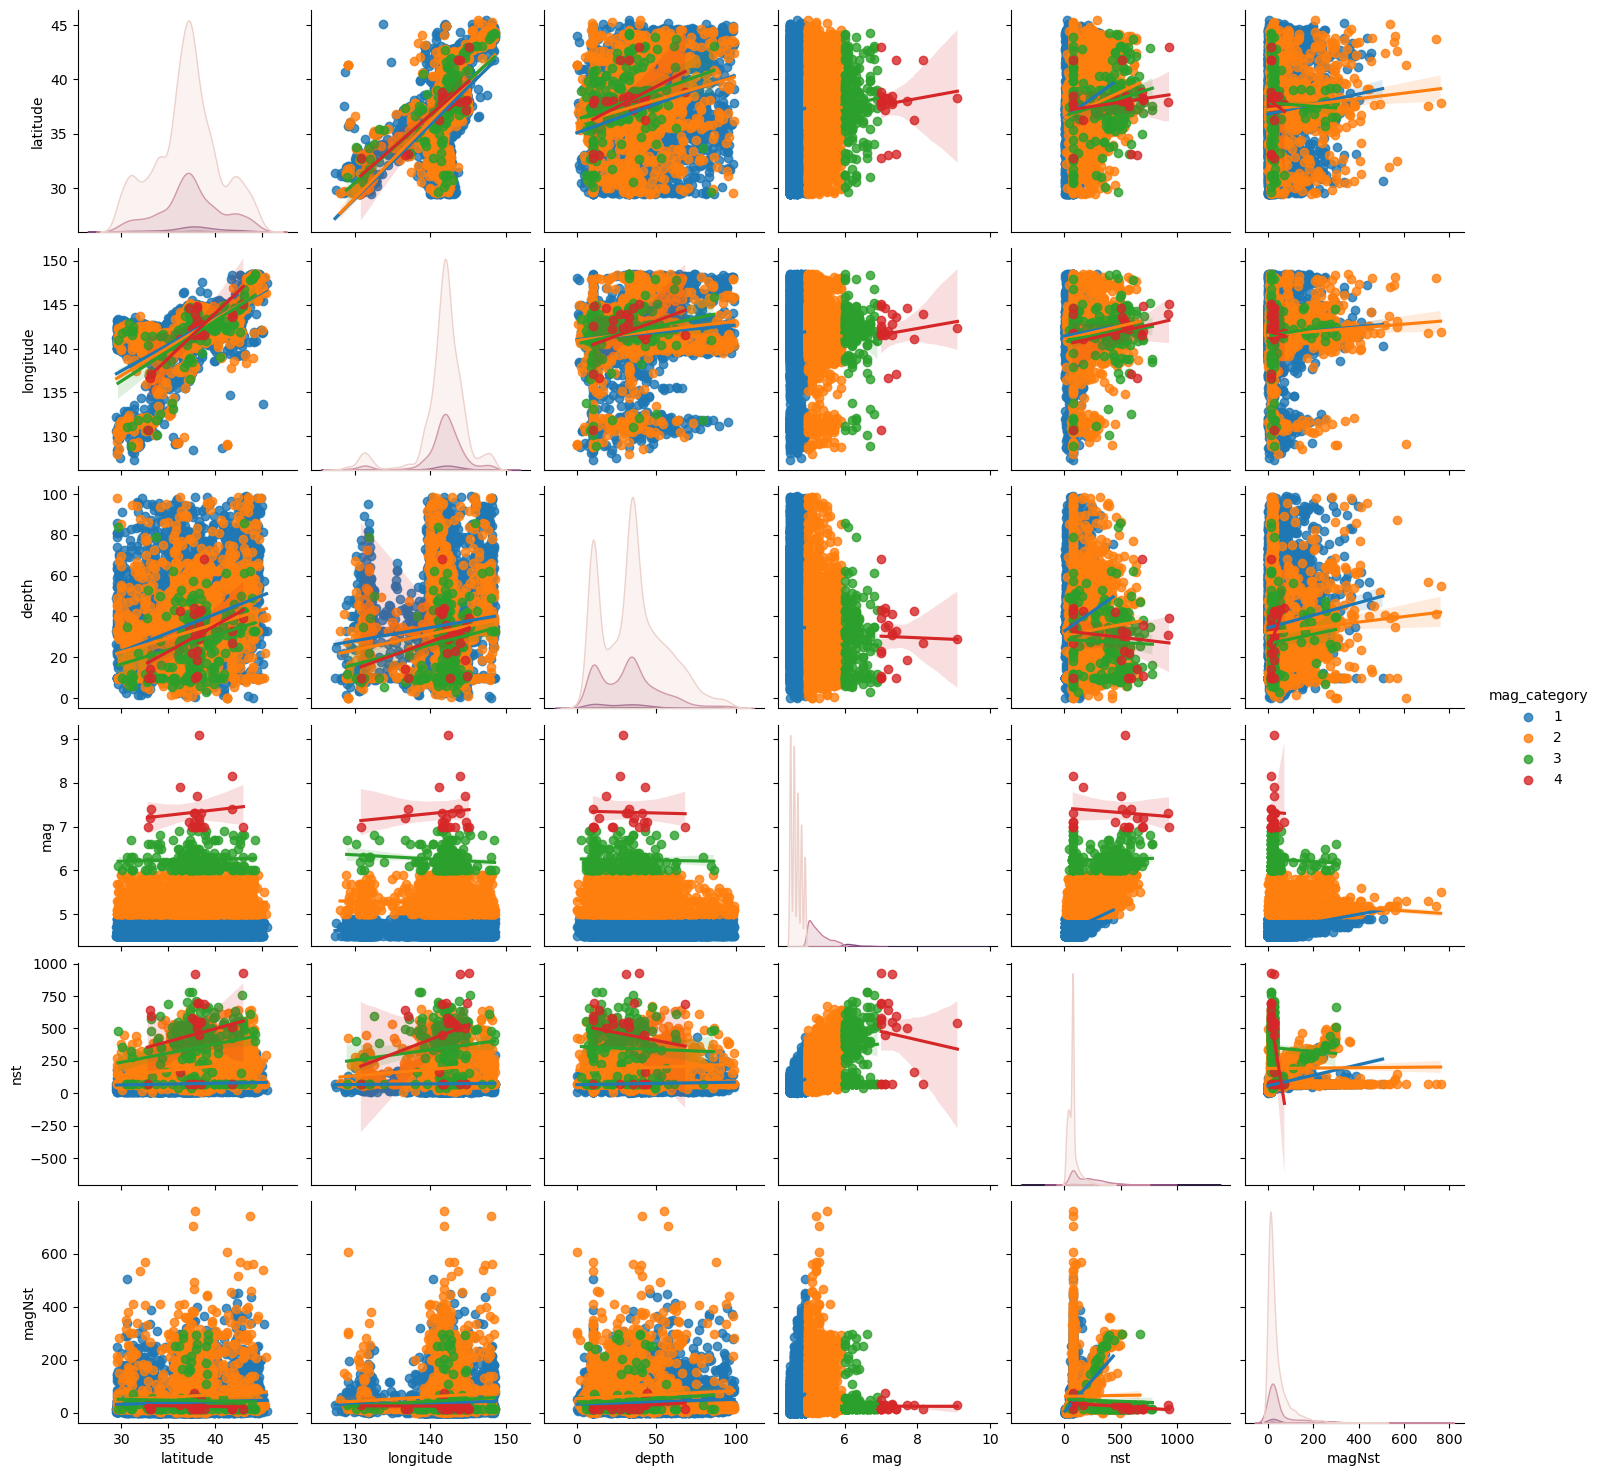

In [86]:
sns.pairplot(data, vars=['latitude', 'longitude', 'depth', 'mag', 'nst', 'magNst'], kind='reg', hue='mag_category')
plt.show()


## here we made use of pairplot to visualise as many features against each other in order to spot anything that we didnt know already and that might be of interest

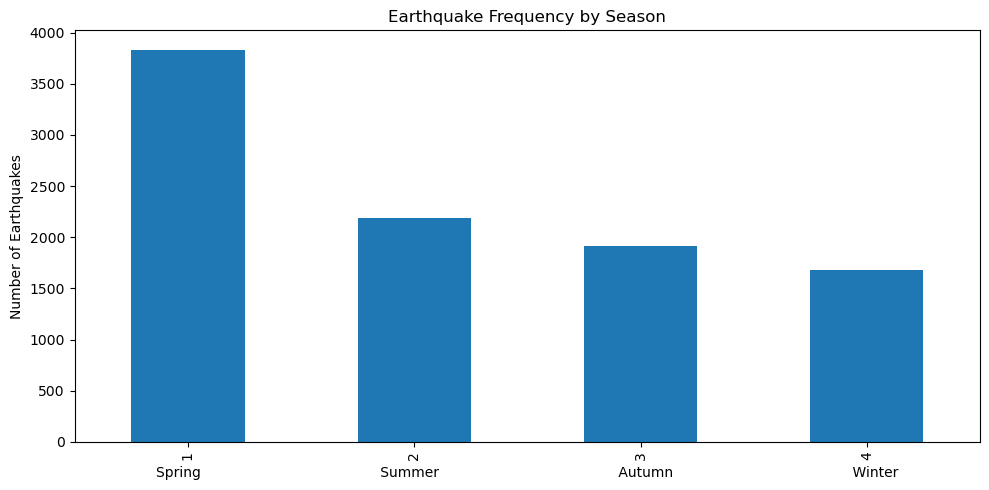

In [87]:
# earthquake frequency by season
plt.figure(figsize=(10, 5))
data['season'].value_counts().reindex([1, 2, 3, 4]).plot(kind='bar')
plt.title('Earthquake Frequency by Season')
plt.xlabel('Spring                                         Summer                                         Autumn                                         Winter')
plt.ylabel('Number of Earthquakes')
plt.tight_layout()
plt.show()


## decided to see if seasons had anything to do with earthquakes and noticed the significant increase in spring. weird because we couldnt find any studies online regarding this finding

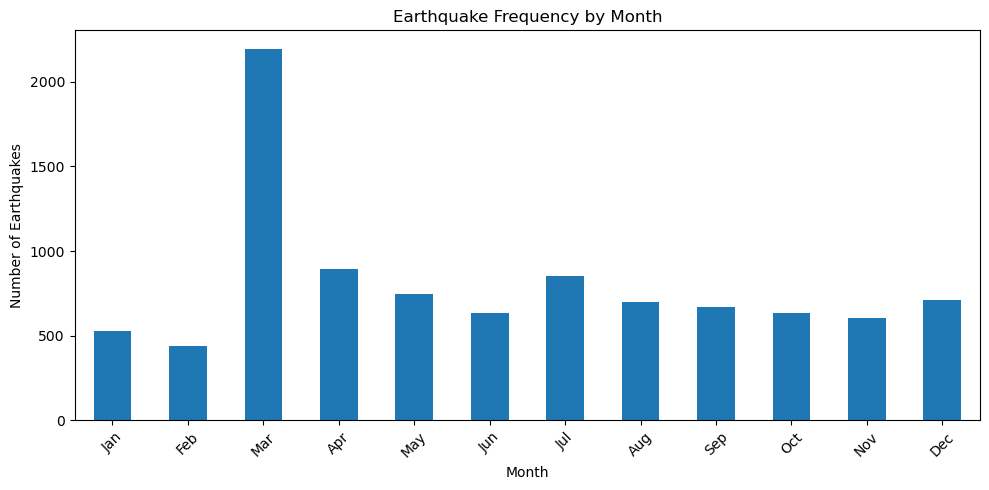

In [88]:
plt.figure(figsize=(10, 5))
data['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Earthquake Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

## decided to see which months were causing the increase for Spring and found out it was march only.

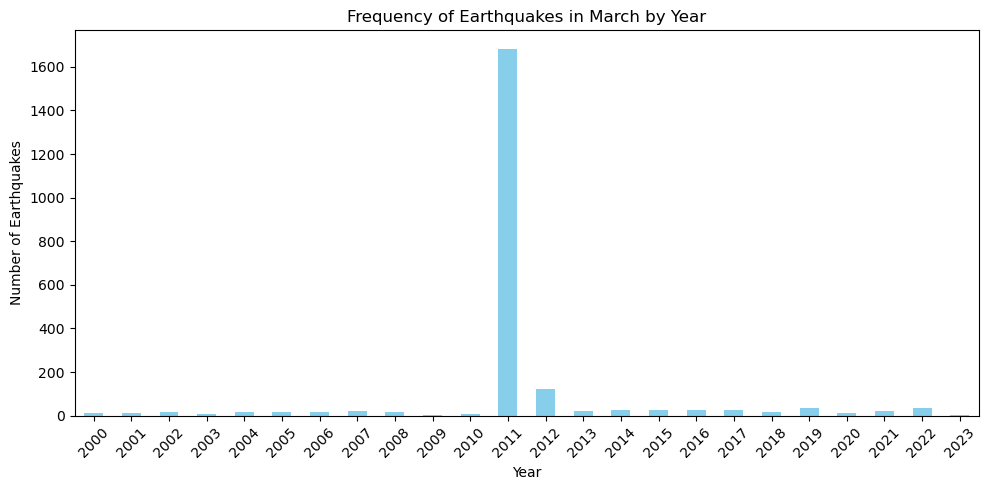

In [89]:
# Filter for March earthquakes
march_eq = data[data['month'] == 3]

march_eq_count = march_eq['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
march_eq_count.plot(kind='bar', color='skyblue')
plt.title('Frequency of Earthquakes in March by Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## filtered to see only March earthquakes throughout the years and noticed it mostly came from 2011's March

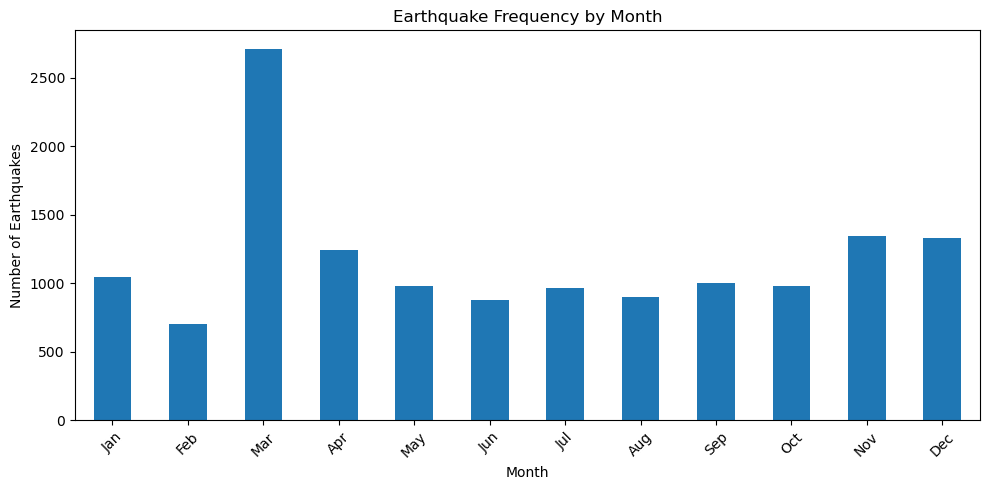

In [90]:
testdata = pd.read_csv('eqtest.csv')

# small quick data cleaning and changing time to datetime format
testdata = testdata.drop_duplicates()
testdata['time'] = pd.to_datetime(testdata['time'])

testdata['month'] = testdata['time'].dt.month

plt.figure(figsize=(10, 5))
testdata['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Earthquake Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

## decided to make sure it was not out data's error and we used a different external kaggle japan earthquake dataset to verify that its the same result 

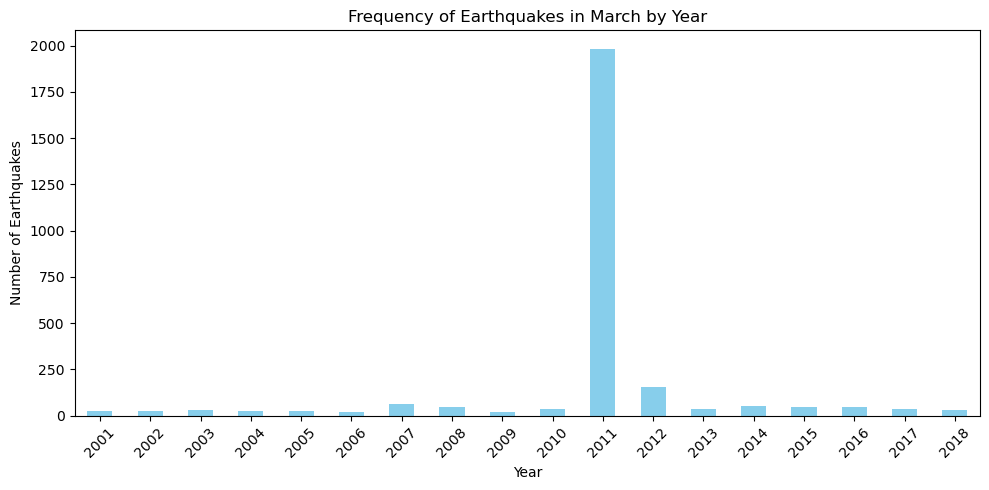

In [93]:
march_eq = testdata[testdata['month'] == 3]

testdata['year'] = testdata['time'].dt.year
testdata['month'] = testdata['time'].dt.month
march_eq_count = march_eq['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
march_eq_count.plot(kind='bar', color='skyblue')
plt.title('Frequency of Earthquakes in March by Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

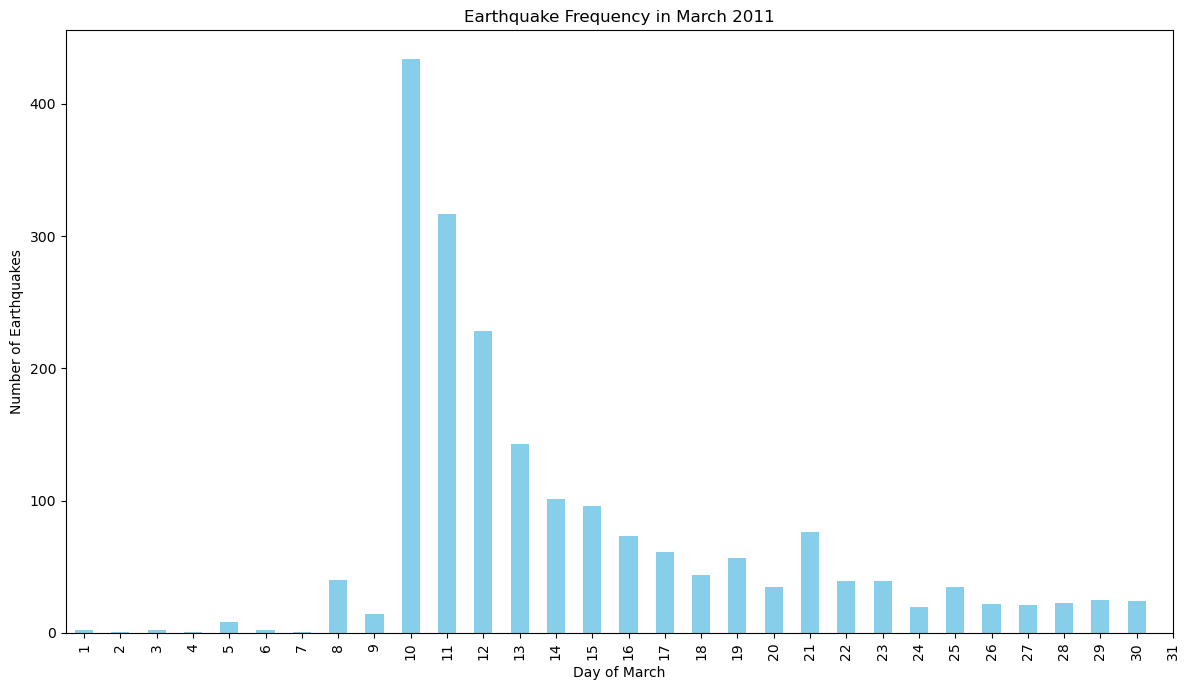

In [95]:
testdata['day'] = testdata['time'].dt.day
# filtering for March 2011
march_2011_data = testdata[(testdata['year'] == 2011) & (testdata['month'] == 3)]

# number of earthquakes for each day in March
march_2011_counts = march_2011_data['day'].value_counts().sort_index()

# bar graph
plt.figure(figsize=(12, 7))
march_2011_counts.plot(kind='bar', color='skyblue')
plt.title('Earthquake Frequency in March 2011')
plt.xlabel('Day of March')
plt.ylabel('Number of Earthquakes')
plt.xticks(range(0, 31), range(1, 32))  # Adjust x-ticks to show every day of March
plt.tight_layout()
plt.show()


## we decided to see which days of march 2011 were contributing to the large number of earthquakes and fount out it was 10th 11th 12th++, which corresponded with the 11 march 2011 Tohoku earthquake with a massive 9.1 magnitude. the days that followed up were attributed to aftershocks, which are smaller earthquakes that occur in the same general area (after a massive earthquake) that can last anywhere from days to years

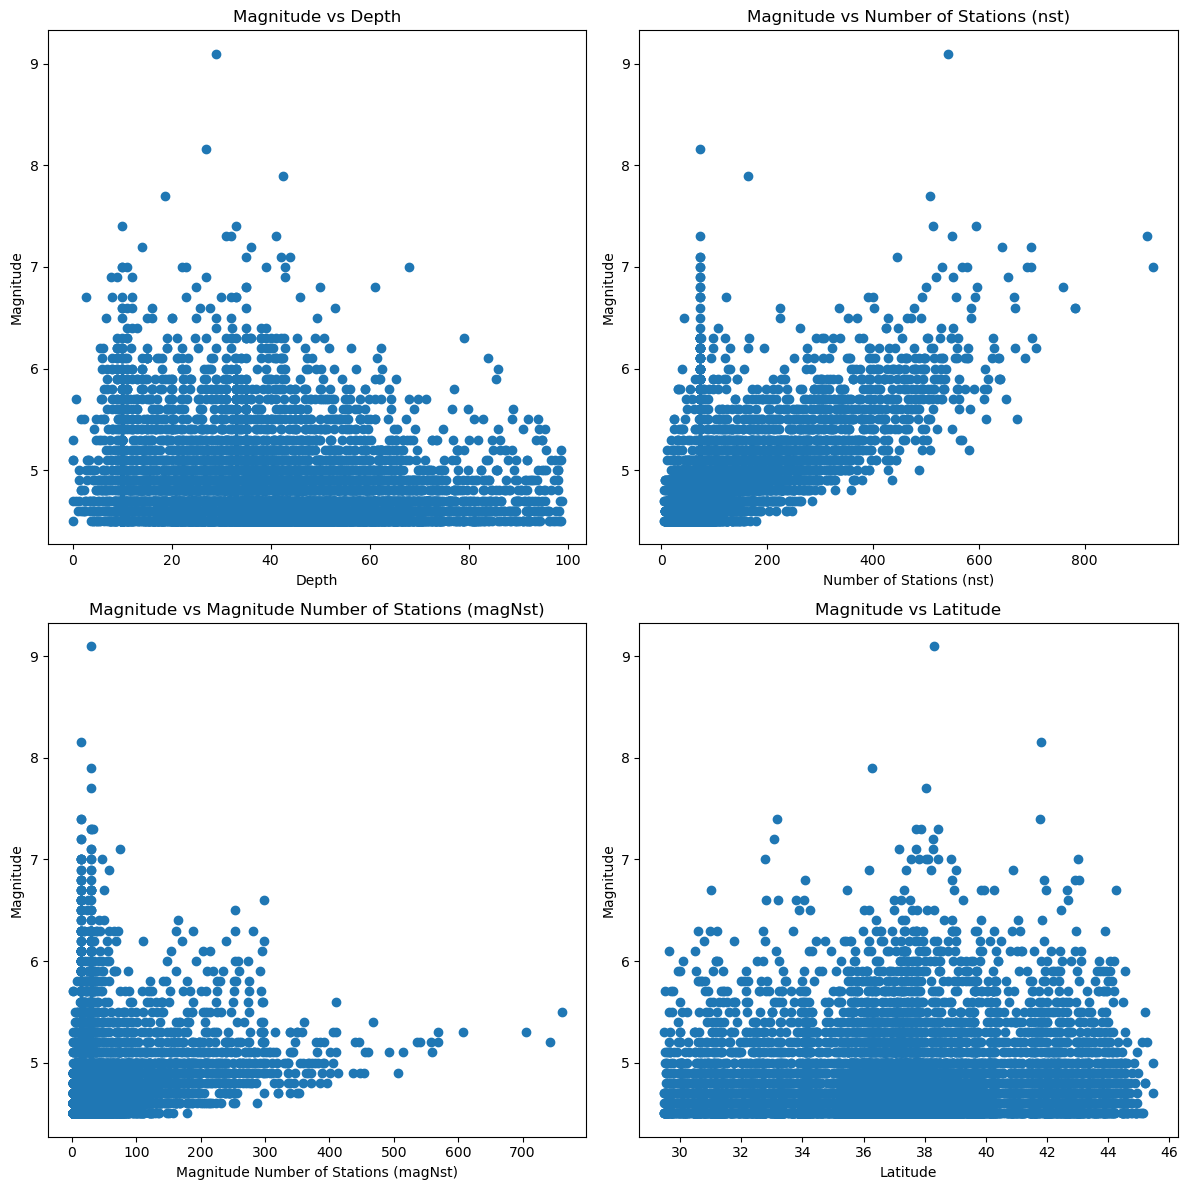

In [97]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax = ax.flatten()

ax[0].scatter(data['depth'], data['mag'])
ax[0].set_title('Magnitude vs Depth')
ax[0].set_xlabel('Depth')
ax[0].set_ylabel('Magnitude')

ax[1].scatter(data['nst'], data['mag'])
ax[1].set_title('Magnitude vs Number of Stations (nst)')
ax[1].set_xlabel('Number of Stations (nst)')
ax[1].set_ylabel('Magnitude')

ax[2].scatter(data['magNst'], data['mag'])
ax[2].set_title('Magnitude vs Magnitude Number of Stations (magNst)')
ax[2].set_xlabel('Magnitude Number of Stations (magNst)')
ax[2].set_ylabel('Magnitude')

ax[3].scatter(data['latitude'], data['mag'])
ax[3].set_title('Magnitude vs Latitude')
ax[3].set_xlabel('Latitude')
ax[3].set_ylabel('Magnitude')

plt.tight_layout()
plt.show()


## comparing scatterplots with diff features plot against magnitude. saw the previously noticed positive correlation of nst and mag

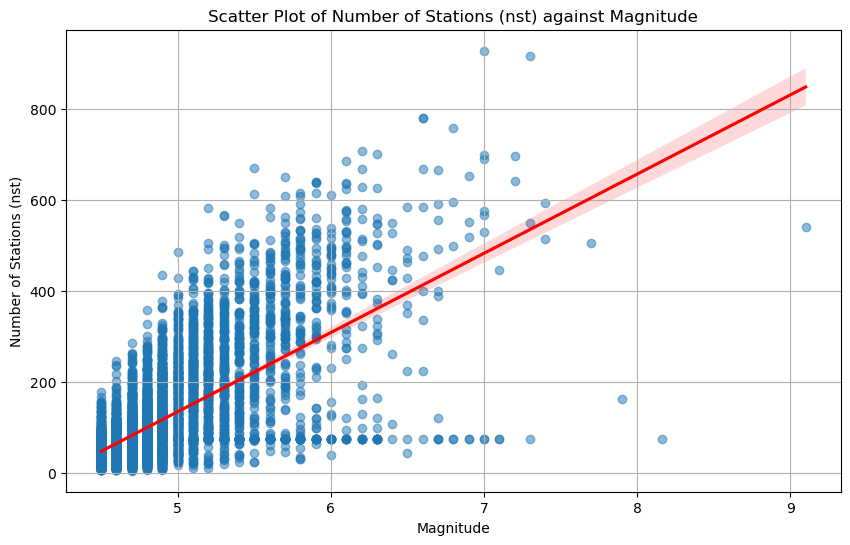

In [98]:
plt.figure(figsize=(10, 6))
# regression line with Seaborn's regplot
sns.regplot(x='mag', y='nst', data=data, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Scatter Plot of Number of Stations (nst) against Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Number of Stations (nst)')
plt.grid(True)
plt.show()


## adding regression line to better visualise the positve correlation

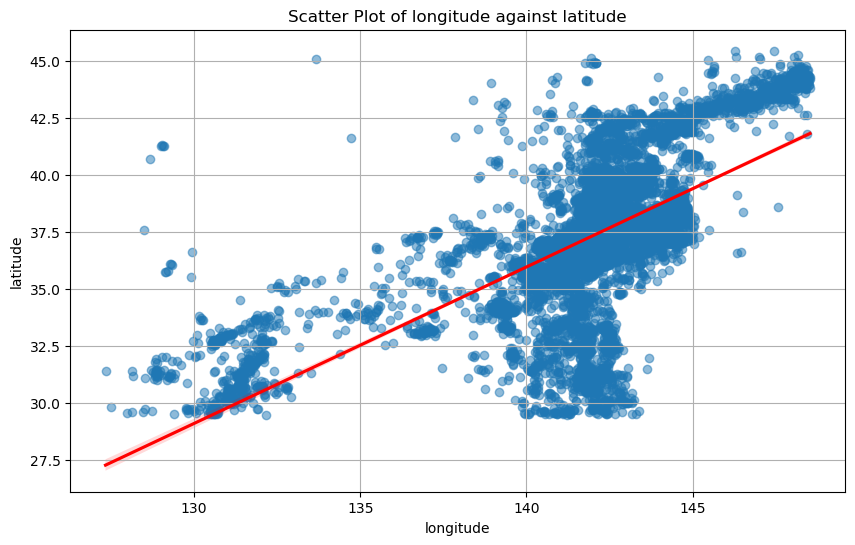

In [100]:
plt.figure(figsize=(10, 6))

sns.regplot(x='longitude', y='latitude', data=data, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Scatter Plot of longitude against latitude')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid(True)
plt.show()


## plotted the same line for longitude and latitude as they had positive correlation too

 Category 1: mag <5.0 
 Category 2: mag >=5.0 and <6.0 
 Category 3: mag >=6.0 and <7.0 
 Category 4: mag >=7.0


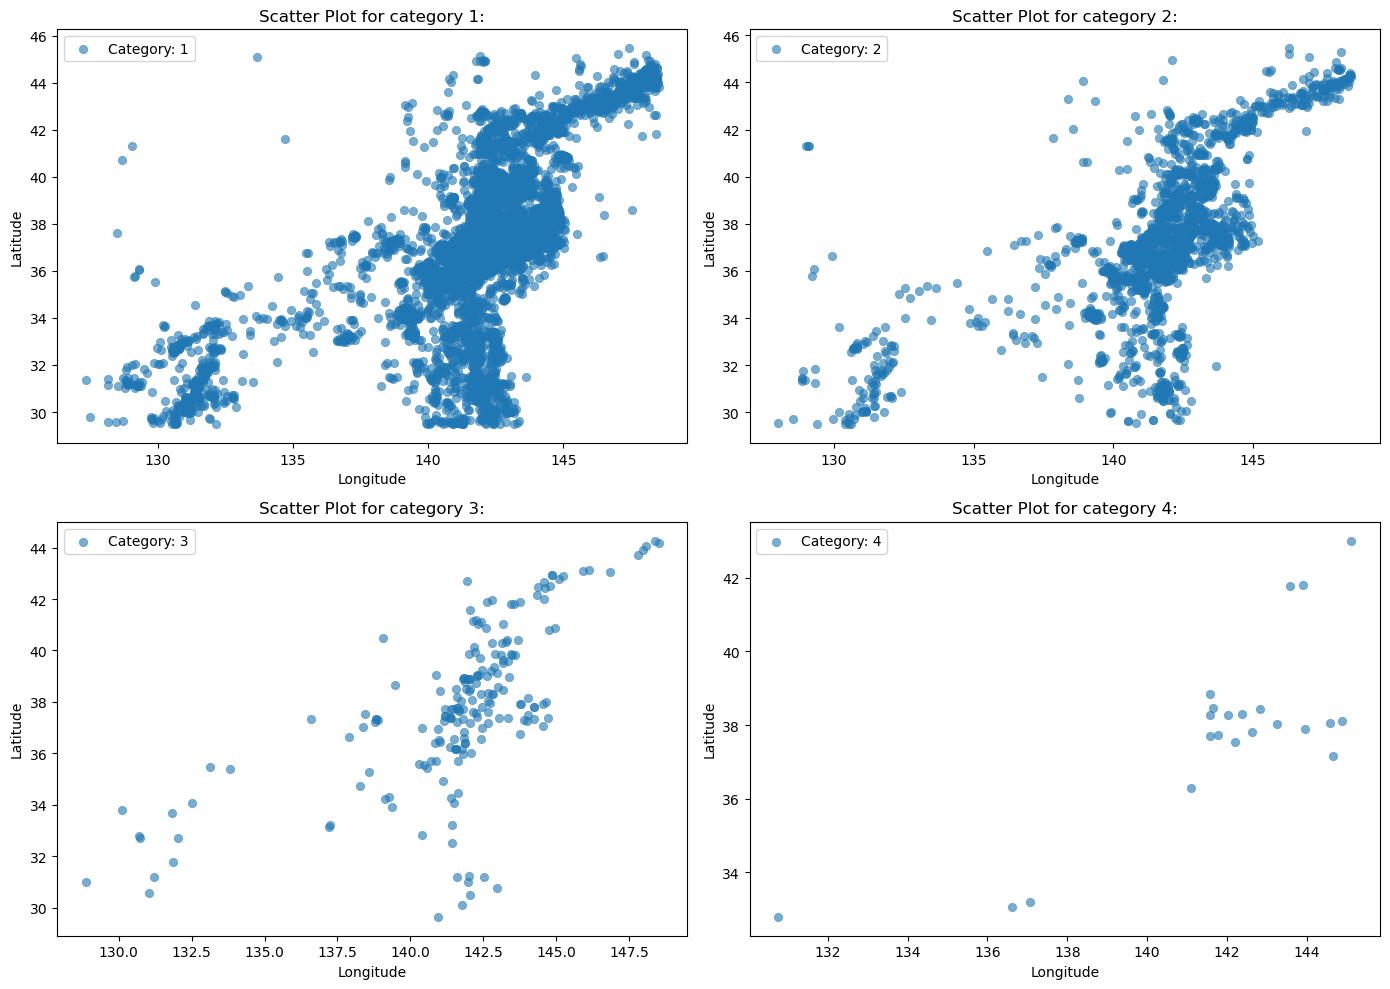

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
categories = data['mag_category'].unique()

# scatter plot for each magnitude category
for ax, category in zip(axes, categories):
    subset = data[data['mag_category'] == category]
    sns.scatterplot(x='longitude', y='latitude', data=subset, ax=ax,
                    alpha=0.6, edgecolor=None, label=f'Category: {category}')
    ax.set_title(f'Scatter Plot for category {category}:')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()

print(" Category 1: mag <5.0 \n Category 2: mag >=5.0 and <6.0 \n Category 3: mag >=6.0 and <7.0 \n Category 4: mag >=7.0")
plt.tight_layout()
plt.show()


## split the earthquakes into their different category of magnitude to compare how different reigons are affected by different levels of earthquakes(count and intensity)

In [102]:
import statsmodels.api as sm

data['lat_lon_interaction'] = data['latitude'] * data['longitude']

# regression analysis
X = data[['latitude', 'longitude', 'lat_lon_interaction']]
y = data['mag']
X = sm.add_constant(X)  # adds a constant term to the predictor

est = sm.OLS(y, X).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                    mag   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     20.37
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.76e-13
Time:                        00:39:48   Log-Likelihood:                -4461.5
No. Observations:                9607   AIC:                             8931.
Df Residuals:                    9603   BIC:                             8960.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.5024    

## trying to model the relationship between the geographical coordinates (latitude and longitude) and the magnitude of earthquakes. Given these results, it appears that the model's ability to predict earthquake magnitudes based on latitude and longitude alone is limited. 